In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.decomposition import NMF
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler,scale,normalize
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.metrics import *
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import *
import matplotlib.pyplot as plt
%matplotlib inline

# Problem 2:PCA & NMF
## (a) preprocessing

In [257]:
data = pd.read_csv('Colleges.txt', sep='\t')
data.drop('college name',inplace=True,axis=1)
data.dropna(inplace=True)


## (b) Run PCA

In [297]:
norm_data = normalize(data,axis=0)#
#norm_data = (data - data.mean())
pca = PCA(n_components=17)
pca.fit(norm_data)
variances = pca.explained_variance_ratio_

In [298]:
cum_variances = []
k = 0.0
for i in variances:
    k+=i
    cum_variances.append(k)

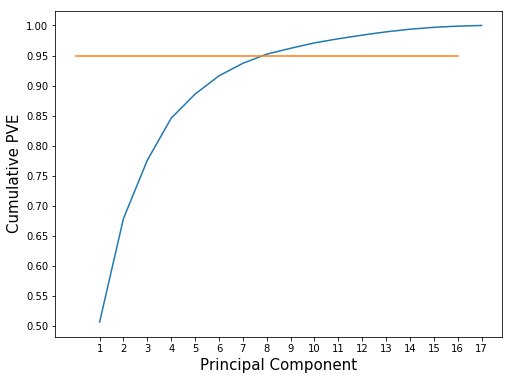

In [299]:
'''
fig = plt.figure(figsize=(8,6))
plt.plot(variances)
plt.ylabel('Proportion of Variance Explained by eigenvalue',fontsize=15)
plt.xlabel('Principal Component',fontsize=15)
plt.show()
'''
fig = plt.figure(figsize=(8,6))
yticks = np.linspace(0.5,1,11)
plt.plot(range(1,18),cum_variances)
plt.plot(0.95*np.ones(17))
plt.xticks(range(1,18))
plt.yticks(yticks)
plt.ylabel('Cumulative PVE',fontsize=15)
plt.xlabel('Principal Component',fontsize=15)
plt.show()


As we can see from the figure above, we need 8 components to capture 95% of the variance in the data. 

In [300]:
pcs = ['PC'+str(i) for i in range(1,18)]
v_T = pd.DataFrame(pca.components_.T,index=data.columns.values,columns=pcs)
v_T[pcs[:3]]

,PC1,PC2,PC3
apps received,0.436000,-0.263735,-0.083196
apps accepted,0.446503,-0.146855,-0.091613
new stud enrolled,0.451651,-0.025573,-0.042923
% new stud from top 10%,0.039528,-0.483218,0.148270
% new stud from top 25%,0.034860,-0.287361,0.089271
num FT undergrad,0.470225,0.026752,-0.004117
num PT undergrad,0.370320,0.390176,0.589736
in-state tuition,-0.110154,-0.414996,0.241611
out-of-state tuition,-0.033458,-0.332763,0.164392
room,0.014474,-0.173355,0.053042


As we can see from the table above, we conclude that **'apps received', 'apps accepted', 'new stud enrolled', 'num FT undergrad' and 'num PT undergrad'** have a great impact on PC1, **'% new stud from top 10%', '% new stud from top 25%' , 'num PT undergrad', 'in-state tuition' and 'out-of-state tuition'** have a great impact on PC2 and **'num PT undergrad', 'in-state tuition' and 'add fees'** have a great impact on PC3. 

## (c) Reasons for normalization before PCA
1. Because the 1st PC of X is unit vector that maximizes the sample variance compared to all other unit vectors, if X is not      zero-centered, the 1st PC might be misled by the mean of the data such that the 1st PC couldn't really maximize the variance of X. The potential influence is as below.
2. Because Var(X\*W) = W.T \* Cov(X, X.T) \* W and Cov(X, X.T) = E(X\*X.T)-X.mean\*X.mean().T, if we do not center X by X-X.mean(), Cov(X, X.T) we get would be larger than the true Cov(X, X.T). Therefore, we need to normalize the data by centering the data.
3. Because the variables in this data have highly different scales, we need to ensure that these variables have the close or even same scale to reduce the influence to build a proper primary component.

## (d)

In [304]:
nmf = NMF(n_components=3,init='nndsvd')
w = nmf.fit_transform(norm_data)

In [305]:
nmf_squared_err = nmf.reconstruction_err_
pca_squared_err = np.square(norm_data-pca.transform(norm_data)).sum().sum()
print 'Squared Error Comparison with R = 3'
print 'NMF\t\tPCA'
print nmf_squared_err,'\t',pca_squared_err
print ''
print 'nmf_squared_err > pca_squared_err = ',nmf_squared_err > pca_squared_err

Squared Error Comparison with R = 3
NMF		PCA
1.24350389669 	20.2265921356

nmf_squared_err > pca_squared_err =  False


In [306]:
pcs = ['PC'+str(i) for i in range(1,18)]
v_T = pd.DataFrame(h.T,index=data.columns.values,columns=pcs[:3])
v_T

,PC1,PC2,PC3
apps received,0.053208,0.716041,0.000000
apps accepted,0.037936,0.691417,0.076842
new stud enrolled,0.025563,0.599177,0.228694
% new stud from top 10%,0.508607,0.182249,0.000000
% new stud from top 25%,0.536489,0.173748,0.038698
num FT undergrad,0.000000,0.571126,0.283220
num PT undergrad,0.000000,0.000000,0.836956
in-state tuition,0.615202,0.000000,0.000000
out-of-state tuition,0.590044,0.088499,0.009910
room,0.540823,0.108522,0.107720


As we can see from the table above, we conclude that **'% new stud from top 10%','% new stud from top 25%', 'in-state tuition', 'out-of-state tuition', 'room', 'board', 'est book costs', '% fac with PHD' and 'graduation rate'** have a great impact on **PC1**; **'apps received', 'apps accepted', 'new stud enrolled' and 'num FT undergrad'** have a great impact on **PC2**; **'num PT undergrad'** has a great impact on **PC3**.

## (e)
By using the two methods, there are three conclusions.
1. PCA's implementation is easier than NMF's becasue PCA only needs the SVD to obtain the components but NMF need much time to search the optimal solution.
2. PCA's component values may be negative but NMF's are all positive so that NMF's interpretability is better.
3. NMF's squared error is lower than PCA's, so NMF does not change the original data too much.

# Problem 3: Simulated Neural Network
## (a)


<function matplotlib.pyplot.show>

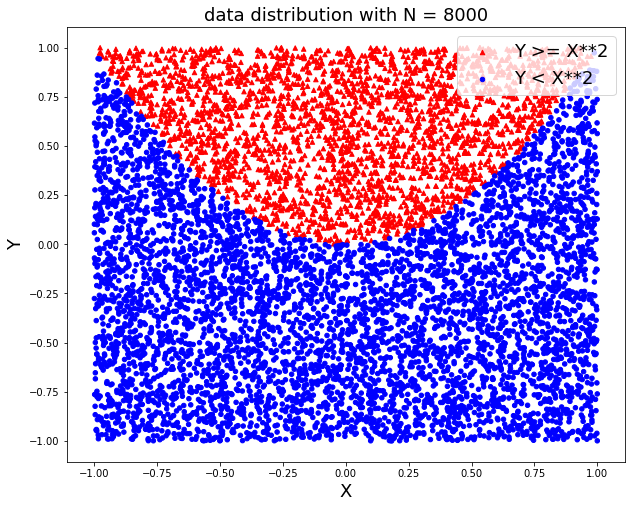

In [45]:
N = 8000
fig = plt.figure(figsize=(10,8))
#x = np.random.standard_normal(N)
#y = np.random.standard_normal(N)
x = np.random.uniform(-1,1,N)
y = np.random.uniform(-1,1,N)
area = np.ones(N)*20  
c = np.sqrt(area)

area1 = np.ma.masked_where([y0 < x0**2 for x0,y0 in zip(x,y) ], area)
area2 = np.ma.masked_where([y0 >= x0**2 for x0,y0 in zip(x,y) ], area)
plt.scatter(x, y, s=area1, marker='^', label='Y >= X**2', c='r')
plt.scatter(x, y, s=area2, marker='o', label='Y < X**2', c='b')
# Show the boundary between the regions:
#theta = np.arange(0, 1, 0.01)
#plt.plot( theta,  np.square(theta))
plt.xlabel('X',fontsize=18)
plt.ylabel('Y',fontsize=18)
plt.title('data distribution with N = '+str(N),fontsize=18)
plt.legend(loc=1,fontsize=18)
plt.show

1. Because this problem is to learn y = square(x), the problem space is 2 dimensions. That means that we do not need huge amount of data for this problem space. Of course, the more the data is given, the better the performance will be. However, more data leads to more time to train. Therefore, I think if the given samples can support me to solve this problem, or build a decision boundary, that is enough.
2. As we can see from the plot above, **8000 samples are enough to fill this space** and **the decision boundary is clear**. 
3. In addition, to improve computation efficiency and avoid the "vanishing gradient" problem, I plan to **create samples according to Gaussian distribution and normalize the data set to zero-mean and standard variation**
4. Because I will split the data set, so I prefer to create 10000 (8000 train and 2000 test) samples.

In [307]:
N = 10000
x = np.random.uniform(-1,1,N)
x2 = np.random.uniform(-1,1,N)
target = np.ones(N)
target[[y0 < x0**2 for x0,y0 in zip(x,x2) ]] = 0
x = np.matrix((x,x2)).T
x = scale(x)
#target = np.matrix(target).T
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, target, test_size=0.2, random_state=42)


## (b)

In [3]:
def cv_score(model,X,Y,cv=3):
    kf = KFold(n_splits=cv)
    score = np.zeros(3)
    for train_index,test_index in kf.split(X):
        train_x, test_x = X[train_index],X[test_index]
        train_y, test_y = Y[train_index],Y[test_index]
        model.fit(train_x,train_y)
        pre = model.predict(test_x)
        temp = [1-metrics.accuracy_score(pre,test_y),metrics.f1_score(test_y,pre),metrics.fbeta_score(test_y,pre,beta=2.0)]
        score = np.mean([score,temp],axis=0)
    return score
def test_score(model,test_x,test_y):
    #model.fit(X,Y)
    pre = model.predict(test_x)
    score = [1-metrics.accuracy_score(pre,test_y),metrics.f1_score(pre,test_y),metrics.fbeta_score(pre,test_y,beta=2.0)]
    return score

### 1 hidden layer

Here I choose max_iter as 500 because I found that 500 iterations can make the learning process converge.

In [ ]:
train_scores = []
for i in range(2,30):
    nn = MLPClassifier(hidden_layer_sizes=(i),activation= 'relu',  solver='adam',  max_iter=500, random_state=2)
    train_scores.append(cv_score(nn,x_train,np.ravel(y_train)))

In [7]:
mat = np.matrix(train_scores)
print np.argmin(mat.T[0]),np.min(mat.T[0])
print np.argmax(mat.T[1]),np.max(mat.T[1])
print np.argmax(mat.T[2]),np.max(mat.T[2])

17 0.0076410061458
17 0.863580955291
17 0.863637140881


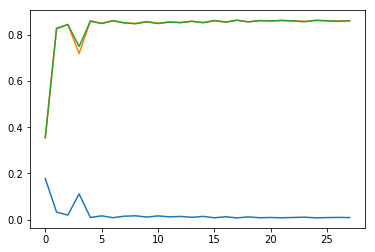

In [8]:
plt.plot(train_scores)

In [31]:
nn = MLPClassifier(hidden_layer_sizes=(19),activation= 'relu',  solver='adam',  max_iter=500, random_state=2)
nn.fit(x_train,y_train)
columns = ['Misclassification Error', 'F1 Score' ,'F2 Score']
print 'CV Score'
pd.DataFrame(data = [cv_score(nn,x_train,y_train)], columns=columns,index=['1 hidden layer (19)'])

CV Score


,Misclassification Error,F1 Score,F2 Score
1 hidden layer (19),0.007641,0.863581,0.863637


### 2 hidden layers

In [18]:
train_scores = []
for i in range(1,30):
    for j in range(1,30):
        nn = MLPClassifier(hidden_layer_sizes=(i,j),activation= 'relu',   solver='adam',  max_iter=500, random_state=2)
        train_scores.append(cv_score(nn,x_train,y_train))

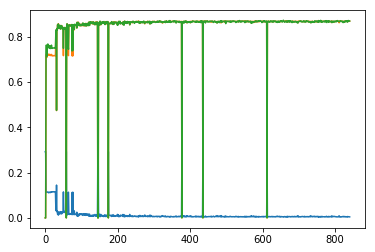

In [21]:
plt.plot(train_scores)

In [19]:
mat = np.matrix(train_scores)
print np.argmin(mat.T[0]),np.min(mat.T[0])
print np.argmax(mat.T[1]),np.max(mat.T[1])
print np.argmax(mat.T[2]),np.max(mat.T[2])

754 0.00304705675857
754 0.870444517093
657 0.872047853807


In [23]:
print (754+1)/29+1
print (754+1)%29

27
1


In [29]:
nn = MLPClassifier(hidden_layer_sizes=(27,1),activation= 'relu', solver='adam',  max_iter=700, random_state=2)
nn.fit(x_train,y_train)
columns = ['Misclassification Error', 'F1 Score' ,'F2 Score']
pd.DataFrame(data = [cv_score(nn,x_test,y_test)], columns=columns,index=['2 hidden layer (12,5)'])

,Misclassification Error,F1 Score,F2 Score
"2 hidden layer (12,5)",0.006003,0.866596,0.864752


According to the analysis above, I prefer to use the 1-layers neural network with 19 nodes because its accuracy, f1 and f2 score are slightly worse than 2-layer neural network but it is simple. I think the simple model is better and enough if it can reach a good performance.

## (c)

In [33]:
nn = MLPClassifier(hidden_layer_sizes=(19),activation= 'relu',  solver='adam',  max_iter=500, random_state=2)
nn.fit(x_train,y_train)
print 'My final NN: 1 hidden layer with 19 nodes'
columns = ['Misclassification Error', 'F1 Score' ,'F2 Score']
pd.DataFrame(data = [test_score(nn,x_test,y_test)], columns=columns,index=['1 hidden layer (19)'])

My final NN: 1 hidden layer with 19 nodes


,Misclassification Error,F1 Score,F2 Score
1 hidden layer (19),0.009,0.987161,0.988007


As we can see, the neural network(NN) with only 1 hidden layer **perform well** on this data set, so I think I do not need more complex model like 2-hidden layer NN to learn. Its decision boundary is shown below.

<function matplotlib.pyplot.show>

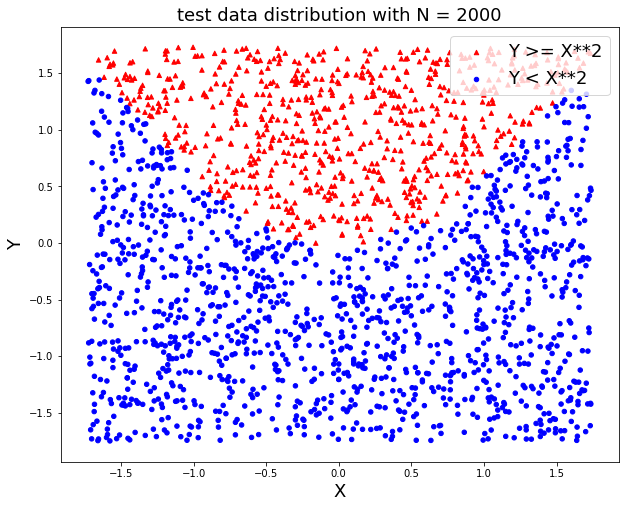

In [34]:
y_pre = nn.predict(x_test)
x = x_test.T[0]
y = x_test.T[1]


area = np.ones(y_pre.shape[0])*20  
c = np.sqrt(area)

area1 = np.ma.masked_where([i == 0 for i in y_pre ], area)
area2 = np.ma.masked_where([i == 1 for i in y_pre ], area)
plt.figure(figsize=(10,8))
plt.scatter(np.ravel(x), np.ravel(y), s=area1, marker='^', label='Y >= X**2', c='r')
plt.scatter(np.ravel(x), np.ravel(y), s=area2, marker='o', label='Y < X**2', c='b')
# Show the boundary between the regions:
#theta = np.arange(0, 1, 0.01)
#plt.plot( theta,  np.square(theta))
plt.xlabel('X',fontsize=18)
plt.ylabel('Y',fontsize=18)
plt.title('test data distribution with N = '+str(y_pre.shape[0]),fontsize=18)
plt.legend(loc=1,fontsize=18)
plt.show

# Problem 4:Thyroid Prediction with Neural Networks

In [308]:
data = pd.read_csv('allhyper.data')
data['class'] = data['class'].str.rsplit('.',expand=True)[0]
data.dropna(axis=1, how='all', inplace=True)
label_types = data.dtypes.values
labels = data.columns

## (a)

In [309]:
miss = pd.DataFrame(data.isnull().sum())/data.shape[0]*100
miss = pd.concat([miss,data.dtypes],axis=1)
miss.columns = ['percentage of missing values','data type']
miss[miss['percentage of missing values']>0]

,percentage of missing values,data type
age,0.035714,float64
sex,3.928571,object
TSH,10.142857,float64
T3,20.892857,float64
TT4,6.571429,float64
T4U,10.607143,float64
FTI,10.535714,float64


As you can see from the table above,
1. There are missing values in data set. We handle the missing values according to their typye:
    (1) using the mean to fill 'float' missing values; 
    (2) using the mode to fill the 'object' value.
2. Because original data are object values, we transform the **object vaues to binary values or multinomial values for convenient computations**. 
3. The original class are **multinomial class values, but here we only care about the 'hyperthyproid' and 'negative'**. So we transform **multinomial class values to binary values** such that '1' is 'hyperthyproid' and '0' is others classes including 'negative'.

In [310]:
for i in range(len(label_types)-1):
    if label_types[i] == 'float':
        data[labels[i]].fillna(data[labels[i]].mean(), inplace=True)
    else:
        data[labels[i]].fillna(data[labels[i]].mode()[0], inplace=True)
object_names = data.dtypes[data.dtypes=='object'].index.values
objects = {}
for key in object_names[:-1]: # not include 'class' column
    objects[key] = data.groupby(key).sum().index.values

most object-type values are binary type except for 'refSource'. So 'refSource' is transformed to a multinomial feature and others are transformed to binary features. In addition, the feature 'TBGInd' is full of single value such that it does not have influence on classification, so it can be removed.

In [311]:
for key, value in objects.items():
    for i in range(len(value)):
        data[key].replace(to_replace=value[i],value=i,inplace=True)
data.drop('TBGInd',axis=1,inplace=True)
data_y = pd.get_dummies(data['class']).iloc[:,2]
data.drop('class',axis=1,inplace=True)

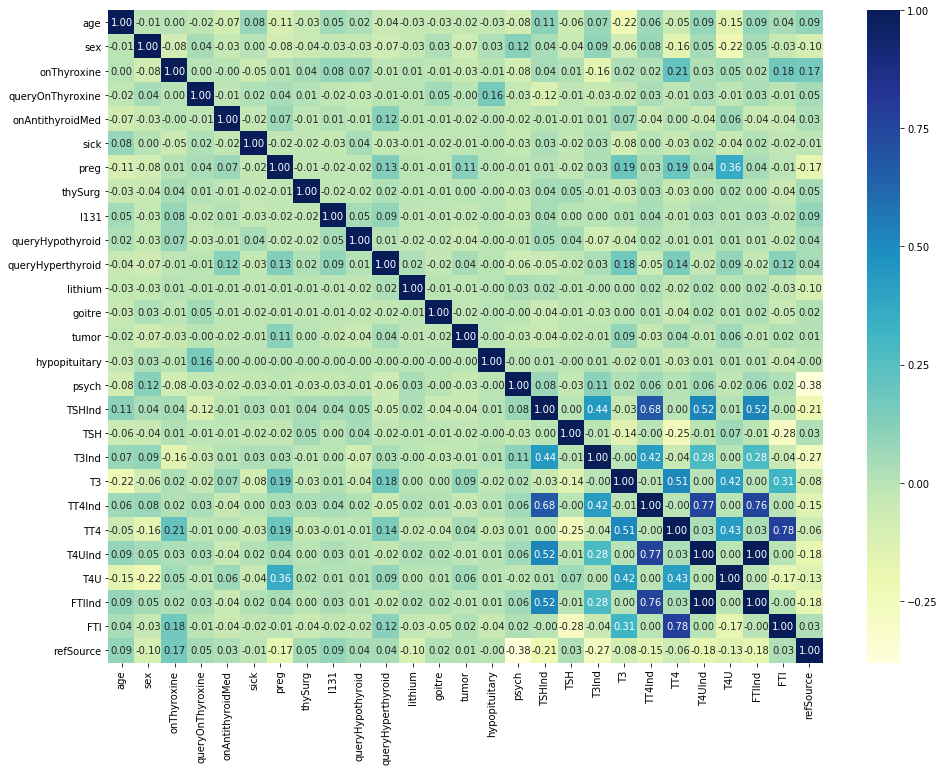

In [314]:
plt.figure(figsize=(16,12))
sns.heatmap(data.corr(),cmap="YlGnBu",annot=True,fmt='.2f')

'T4UInd' and 'FTIInd' are highly correlated, so we have to drop one of them.

In [134]:
data.drop('T4UInd',axis=1,inplace=True)

For fast computation and avoiding "vanishing gradient", the data is normalized by zero-mean and unit variance.

In [135]:
scaler = StandardScaler()
data = scaler.fit_transform(data)
data = np.matrix(data)
data_y = np.matrix(data_y).T
x_train, x_test, y_train, y_test = model_selection.train_test_split(data, data_y, test_size=0.25, random_state=42)

## (b)

In [12]:
def cv_score(model,X,Y,cv=5):
    kf = KFold(n_splits=cv)
    score = np.zeros(3)
    for train_index,test_index in kf.split(X):
        train_x, test_x = X[train_index],X[test_index]
        train_y, test_y = Y[train_index],Y[test_index]
        model.fit(train_x,train_y)
        pre = model.predict(test_x)
        temp = [1-metrics.accuracy_score(pre,test_y),metrics.f1_score(test_y,pre),metrics.fbeta_score(test_y,pre,beta=2.0)]
        score = np.mean([score,temp],axis=0)
    return score
def test_score(model,test_x,test_y):#X,Y,
    #model.fit(X,Y)
    pre = model.predict(test_x)
    score = [1-metrics.accuracy_score(pre,test_y),metrics.f1_score(pre,test_y),metrics.fbeta_score(pre,test_y,beta=2.0)]
    return score

In [139]:
print 'percentage of class = "hyperthyroid" in the data:\t', (np.sum(data_y))/len(data_y)*100,'%'

percentage of class = "hyperthyroid" in the data:	2.21428571429 %


Because of the imbalanced data set, I prefer to use **F2 score** as the main assessment criterion. This data set only has 2.21% data of positive class so that the models are easily to be overfitting on negative class such that F score cannot reach higher. Therefore, because I want more true positives, the models are required to focus on **F2 score with high weighted recall** instead of accuracy and F1 score which in parallel weights the precision and recall.

### Neural Network

In [ ]:
train_scores = []
test_scores = []
for i in range(5,30):
    for j in range(5,30):
        nn = MLPClassifier(hidden_layer_sizes=(i,j),activation= 'relu', solver='adam', max_iter=500, random_state=2)#early_stopping=True,
        train_scores.append(cv_score(nn,x_train,y_train))
        test_scores.append(test_score(nn,x_test,y_test))

In [ ]:
mat = np.matrix(train_scores)
print np.argmin(mat.T[0]),np.min(mat.T[0])
print np.argmax(mat.T[1]),np.max(mat.T[1])
print np.argmax(mat.T[2]),np.max(mat.T[2])

Because exploring the optimal parameter takes too much time, I **run this part code on the 'Colfax'** and get the optimal parameter below.

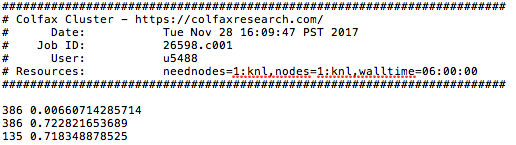

In [50]:
print 'best hidden layer nodes combination: (',(386+1)/25+1+4, ',', (386+1)%25+4,')'

best hidden layer nodes combination: ( 20 , 16 )


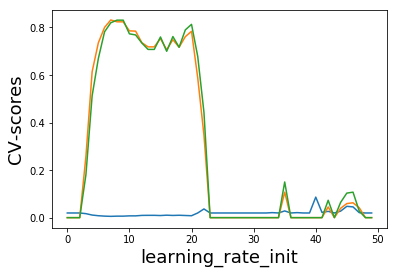

Best learing_rate_init
0.000429193426013


In [152]:
learning_rates = np.logspace(-5,5)
scores = []
for i in np.logspace(-5,5):
    nn = MLPClassifier(hidden_layer_sizes=(20,16), learning_rate_init = i,activation= 'relu', solver='adam', max_iter=500, random_state=2)
    scores.append( cv_score(nn,x_train,np.ravel(y_train)))
    #print test_score(nn,x_test,np.ravel(y_test))
scores=np.matrix(scores).T
plt.plot(range(len(learning_rates)),scores[0].T,label='Misclassification')
plt.plot(range(len(learning_rates)),scores[1].T,label='F1 score')
plt.plot(range(len(learning_rates)),scores[2].T,label='F2 score')
#plt.xticks(range(len(learning_rates)),learning_rates)
plt.xlabel('learning_rate_init',fontsize=18)
plt.ylabel('CV-scores',fontsize=18)
plt.show()

print 'Best learing_rate_init'
print learning_rates[np.argmax(np.matrix(scores)[2])]

In [100]:
print 'Neural Network with optimal hyperparameters'
nn = MLPClassifier(hidden_layer_sizes=(20,16), learning_rate_init = 0.0004,activation= 'relu', solver='adam', max_iter=500, random_state=2)
train_scores = cv_score(nn,x_train,np.ravel(y_train))
test_scores = test_score(nn,x_test,np.ravel(y_test))
table = pd.DataFrame(data=[train_scores,test_scores],index=['train','test'],columns=['Misclassification',' F1 score ', ' F2 score'])
table.head()

Neural Network with optimal hyperparameters


,Misclassification,F1 score,F2 score
train,0.006324,0.823555,0.830495
test,0.015714,0.620690,0.661765


### SVM

In [42]:
c_arr = np.logspace(2,4,30)
lin_scores = []
for c in c_arr:
    lin = svm.SVC(C=c,kernel='linear')
    lin_score = cv_score(lin,x_train,y_train)
    lin_scores.append(lin_score)
lin_scores = np.array(lin_scores).transpose()
print 'optimal parameter:'
lin_opt_c = c_arr[np.argmax(lin_scores[2])]
print 'lin_opt_c = ', lin_opt_c

optimal parameter:
lin_opt_c =  788.046281567


In [62]:
print 'Linear SVM with optimal hyperparameters'

lin = svm.SVC(C=788.046281567,kernel='linear')
train_scores = cv_score(lin,x_train,np.ravel(y_train))
test_scores = test_score(lin,x_test,np.ravel(y_test))
table = pd.DataFrame(data=[train_scores,test_scores],index=['train','test'],columns=['Misclassification',' F1 score ', ' F2 score'])
table.head()

Linear SVM with optimal hyperparameters


,Misclassification,F1 score,F2 score
train,0.009821,0.719019,0.728457
test,0.017143,0.666667,0.625000


In [36]:
c_arr = np.logspace(0,3,30)
poly_scores =[]
for c in c_arr:

    poly = svm.SVC(C=c,kernel='poly',degree=2)
    score = cv_score(poly,x_train,y_train)
    poly_scores.append(score)
poly_scores = np.array(poly_scores).transpose()

#arr = range(len(c_arr)*len(d_arr))
print 'optimal parameter:'
poly_opt_c = c_arr[np.argmax(poly_scores[2])]
#poly_opt_d = d_arr[arr[np.argmax(poly_scores[2])]%len(d_arr)]
print 'poly_opt_c = ', poly_opt_c


optimal parameter:
poly_opt_c =  2.04335971786


In [61]:
print 'Polynomial SVM with optimal hyperparameters'

poly = svm.SVC(C=2.04335971786,kernel='poly',degree=2)
train_scores = cv_score(poly,x_train,np.ravel(y_train))
test_scores = test_score(poly,x_test,np.ravel(y_test))
table = pd.DataFrame(data=[train_scores,test_scores],index=['train','test'],columns=['Misclassification',' F1 score ', ' F2 score'])
table.head()

Polynomial SVM with optimal hyperparameters


,Misclassification,F1 score,F2 score
train,0.008185,0.756841,0.703664
test,0.018571,0.518519,0.583333


In [40]:
c_arr = np.logspace(-5,6,20)
g_arr = np.logspace(-3,3,20)
rbf_scores =[]
for c in c_arr:
    for g in g_arr:
        rbf = svm.SVC(C=c,kernel='rbf',gamma=g)
        score = cv_score(rbf,x_train,y_train)
        rbf_scores.append(score)
rbf_scores = np.array(rbf_scores).transpose()

arr = range(len(c_arr)*len(g_arr))
print 'optimal parameter:'
print 'C = ', c_arr[arr[np.argmax(rbf_scores[2])]/len(g_arr)], 'C_index=', arr[np.argmax(rbf_scores[2])]/len(g_arr)
print 'gamma = ', g_arr[arr[np.argmax(rbf_scores[2])]%len(g_arr)]
print 'F2 score=', np.max(rbf_scores[2])

optimal parameter:
C =  6.15848211066 C_index= 10
gamma =  0.0183298071083
F2 score= 0.711543495395


In [101]:
print 'RBF SVM with optimal hyperparameters'

rbf = svm.SVC(C=6.15848211066,kernel='rbf',gamma=0.0183298071083)
train_scores = cv_score(rbf,x_train,np.ravel(y_train))
test_scores = test_score(rbf,x_test,np.ravel(y_test))
table = pd.DataFrame(data=[train_scores,test_scores],index=['train','test'],columns=['Misclassification',' F1 score ', ' F2 score'])
table.head()

RBF SVM with optimal hyperparameters


,Misclassification,F1 score,F2 score
train,0.010342,0.712142,0.711543
test,0.017143,0.600000,0.625000


### Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
scores= []
for i in range(1,30):
    for j in range(1,30):
        rf = RandomForestClassifier(n_estimators = 20, max_depth=i,min_samples_leaf=j, n_jobs=-1, random_state=0)
        scores.append(cv_score(rf,x_train,np.ravel(y_train)))
        

In [20]:
np.max(scores[2])

0.77456747213824306

In [15]:
scores = np.matrix(scores).T
print 'optimal max_depth: ',(np.argmax(scores[2])+1)/29+1
print 'optimal min_samples_leaf: ',(np.argmax(scores[2])+1)%29

optimal max_depth:  6
optimal min_samples_leaf:  2


In [34]:
scores= []
for k in range(15,30):
    rf = RandomForestClassifier(n_estimators = k, max_depth= 6, min_samples_leaf = 2, n_jobs=-1, random_state=0)
    scores.append(cv_score(rf,x_train,np.ravel(y_train)))


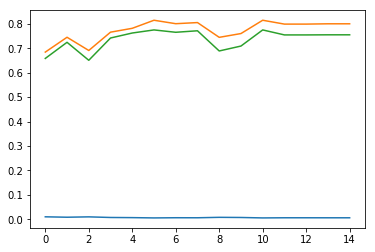

In [35]:
plt.plot(scores)

In [36]:
scores = np.matrix(scores).T
print 'optimal # estimators: ',range(15,30)[(np.argmax(scores[2]))]

optimal # estimators:  20


In [88]:
print 'Random Forest with optimal hyperparameters'

rf = RandomForestClassifier(n_estimators = 20, max_depth= 6, min_samples_leaf = 2, n_jobs=-1, random_state=0)
train_scores = cv_score(rf,x_train,np.ravel(y_train))
test_scores = test_score(rf,x_test,np.ravel(y_test))
table = pd.DataFrame(data=[train_scores,test_scores],index=['train','test'],columns=['Misclassification',' F1 score ', ' F2 score'])
table.head()


Random Forest with optimal hyperparameters


,Misclassification,F1 score,F2 score
train,0.006771,0.798371,0.754157
test,0.017143,0.571429,0.625000


In [117]:
train_scores = []
test_scores = []
nn = MLPClassifier(hidden_layer_sizes=(20,16), learning_rate_init = 0.0004,activation= 'relu', solver='adam', max_iter=500, random_state=2)
rf = RandomForestClassifier(n_estimators = 20, max_depth= 6, min_samples_leaf = 2, n_jobs=-1, random_state=0)
lin = svm.SVC(C=788.046281567,kernel='linear')
poly = svm.SVC(C=2.04335971786,kernel='poly',degree=2)
rbf = svm.SVC(C=6.15848211066,kernel='rbf',gamma=0.0183298071083)
models = [nn,rf,lin,poly,rbf]
names = ['Neural Network','Random Forest','Linear SVM','Polynomial SVM','RBF SVM']
for model in models:
    train_scores.append(cv_score(model,x_train,np.ravel(y_train)))
    test_scores.append(test_score(model,x_test,np.ravel(y_test)))

In [119]:
print 'Train-Validation Score comparison'
table = pd.DataFrame(data=train_scores,index=names,columns=['Misclassification',' F1 score ', ' F2 score'])
table.head()

Train-Validation Score comparison


,Misclassification,F1 score,F2 score
Neural Network,0.006324,0.823555,0.830495
Random Forest,0.006176,0.814160,0.774567
Linear SVM,0.009821,0.719019,0.728457
Polynomial SVM,0.008185,0.756841,0.703664
RBF SVM,0.010342,0.712142,0.711543


In [120]:
print 'Test Score comparison'
table = pd.DataFrame(data=test_scores,index=names,columns=['Misclassification',' F1 score ', ' F2 score'])
table.head()

Test Score comparison


,Misclassification,F1 score,F2 score
Neural Network,0.015714,0.620690,0.661765
Random Forest,0.017143,0.571429,0.625000
Linear SVM,0.017143,0.666667,0.625000
Polynomial SVM,0.018571,0.518519,0.583333
RBF SVM,0.017143,0.600000,0.625000


As we can see above, for my data set, the neural network with its optimal hyperparameters has the best performance among these models. 
1. First, there is an interesting thing here that some models's best F2 scores and misclassification errors are the same. I think this phenomenon results from the data split, I tried to split the data with different proportion and then they were different. However, because at the beginning I optimized my NN model with this kind of data split and it will spend much time to optimize it again, I plan to keep this result table even though it looks like weird. 

2. According to **score matrics**, it is obvious that the performance of **Neural Network(NN) is better** than others'. Given the subtle difference on misclassification error, the F2 score and F1 score of NN is higher than that of other models. 

3. According to the **computational complexity**, **the computational cost of NN is the highest one**. Because of its large amount of parameters like weights to train, NN's performance is better than others', but its computational complexity is much higher than others. NN need more time to train the model or networks. 

4. According to **numbers of parameters**, the **NN has the most numbers of parameters to tweak**, such as 'learning rates', 'activate functions' and especially 'hidden layers' that has various combinations to consider. Random Forest also has many parameters to tweak, such as numbers of estimators, decision criterion, max_depth and min_sample_leafs. SVM models have several important parameters to tweak, such as penalty parameter, kernel type and other parameter related to different kernels.